# Creating a network-wide ad blocker using a Raspberry Pi 3B+ and the Raspbian operating system

## GEOS505 Final Report
### Aaron Marshall | 10 Dec. 2018

pihole.png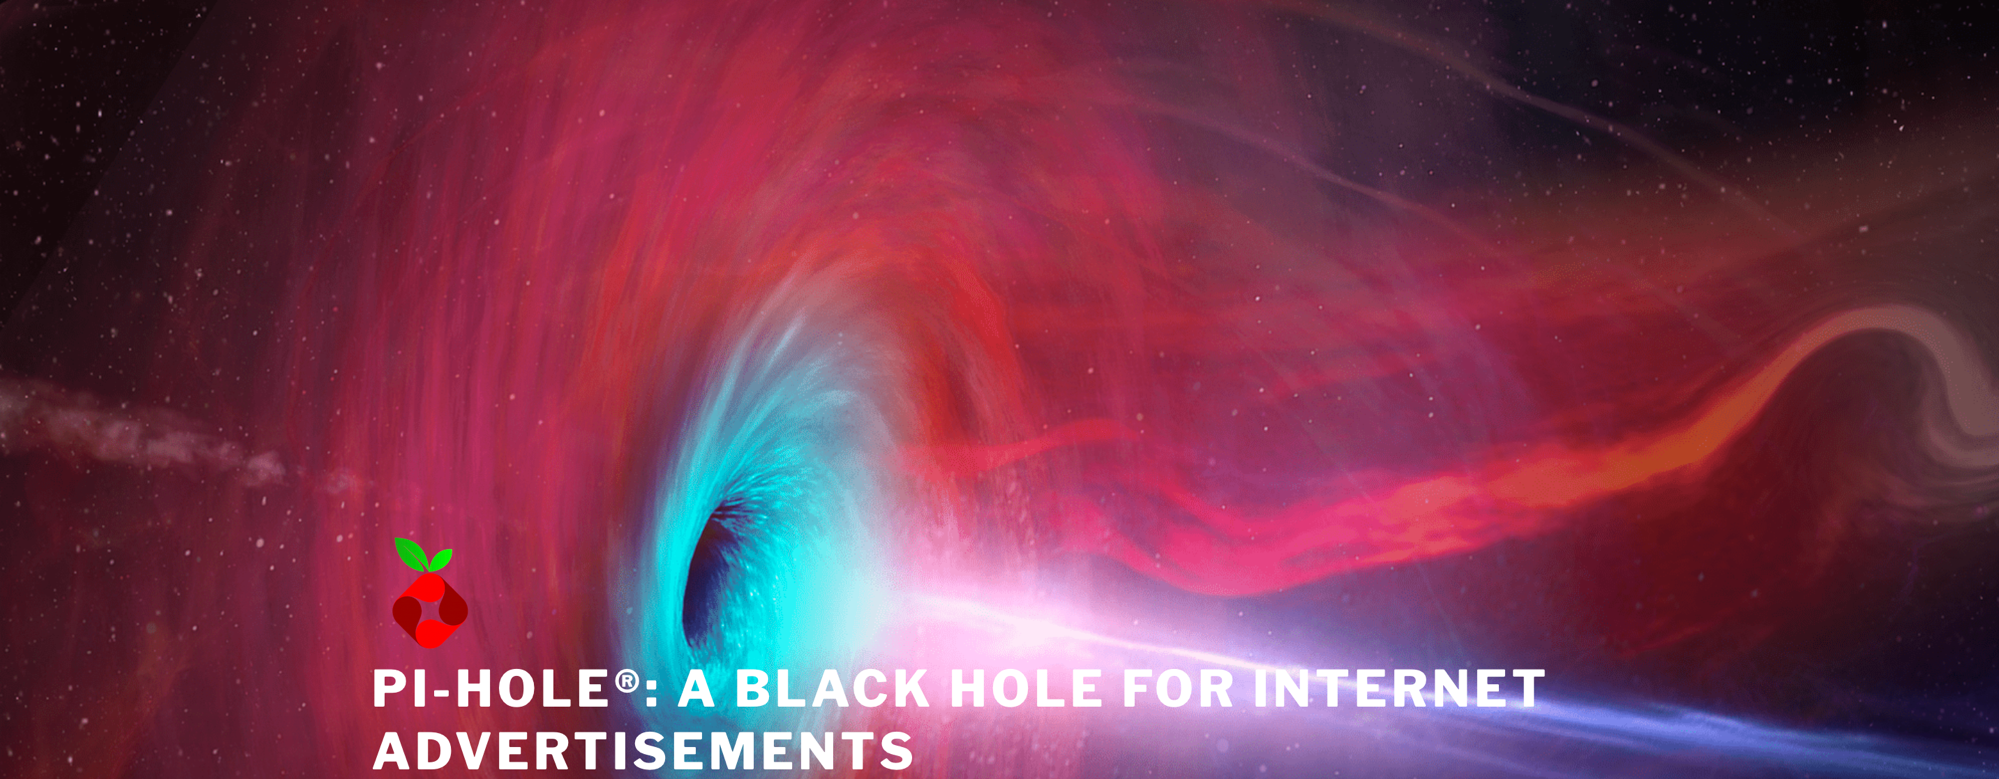

#### Introduction

The Raspberry Pi (RP, https://www.raspberrypi.org) is a small computer created to teach computing skills to novices. The RP runs on the Linux-based Raspbian operating system (https://www.raspberrypi.org/downloads/raspbian/). Common RP projects include automating smart homes, creating retro gaming emulators, running models, and creating mini servers for home media systems. Here, I use a RP 3B+ to create a network-wide ad blocker for my smart home using the open source code Pi-hole (https://pi-hole.net). This report will be a step-by-step guide to the process I followed, with Linux commands provided where necessary, as well as errors I encountered and how I worked around them.

#### Materials and Software

The necessary materials include a Raspberry Pi 3B+ (although the cheaper Pi Zero will work as well), a microSD card with adaptor for normal SD card slots, a power supply, monitor, and keyboard. In this walkthrough, we will only need the monitor and keyboard for initial setup. We will need the Raspbian operating software (OS), Pi-hole program, and a flashing program (I use https://www.balena.io/etcher/) to transfer Raspbian to the microSD card.

pipi.jpg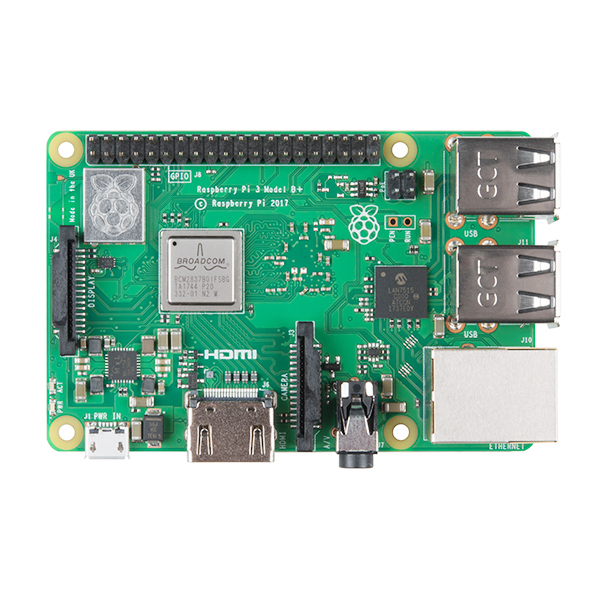

#### Downloading and Installing Raspbian to the Pi

First, place the microSD card and adaptor into your computer and download the Raspbian lite OS. The file will need to be unzipped to obtain an .img file that contains Raspbian. Next, open up your flashing program and select the Raspbian .img file, your microSD card, and begin flashing the OS to the microSD card. Be careful that the microSD card is selected and not an external harddrive or harddrive partition as this process will overwrite the selected device.

first.png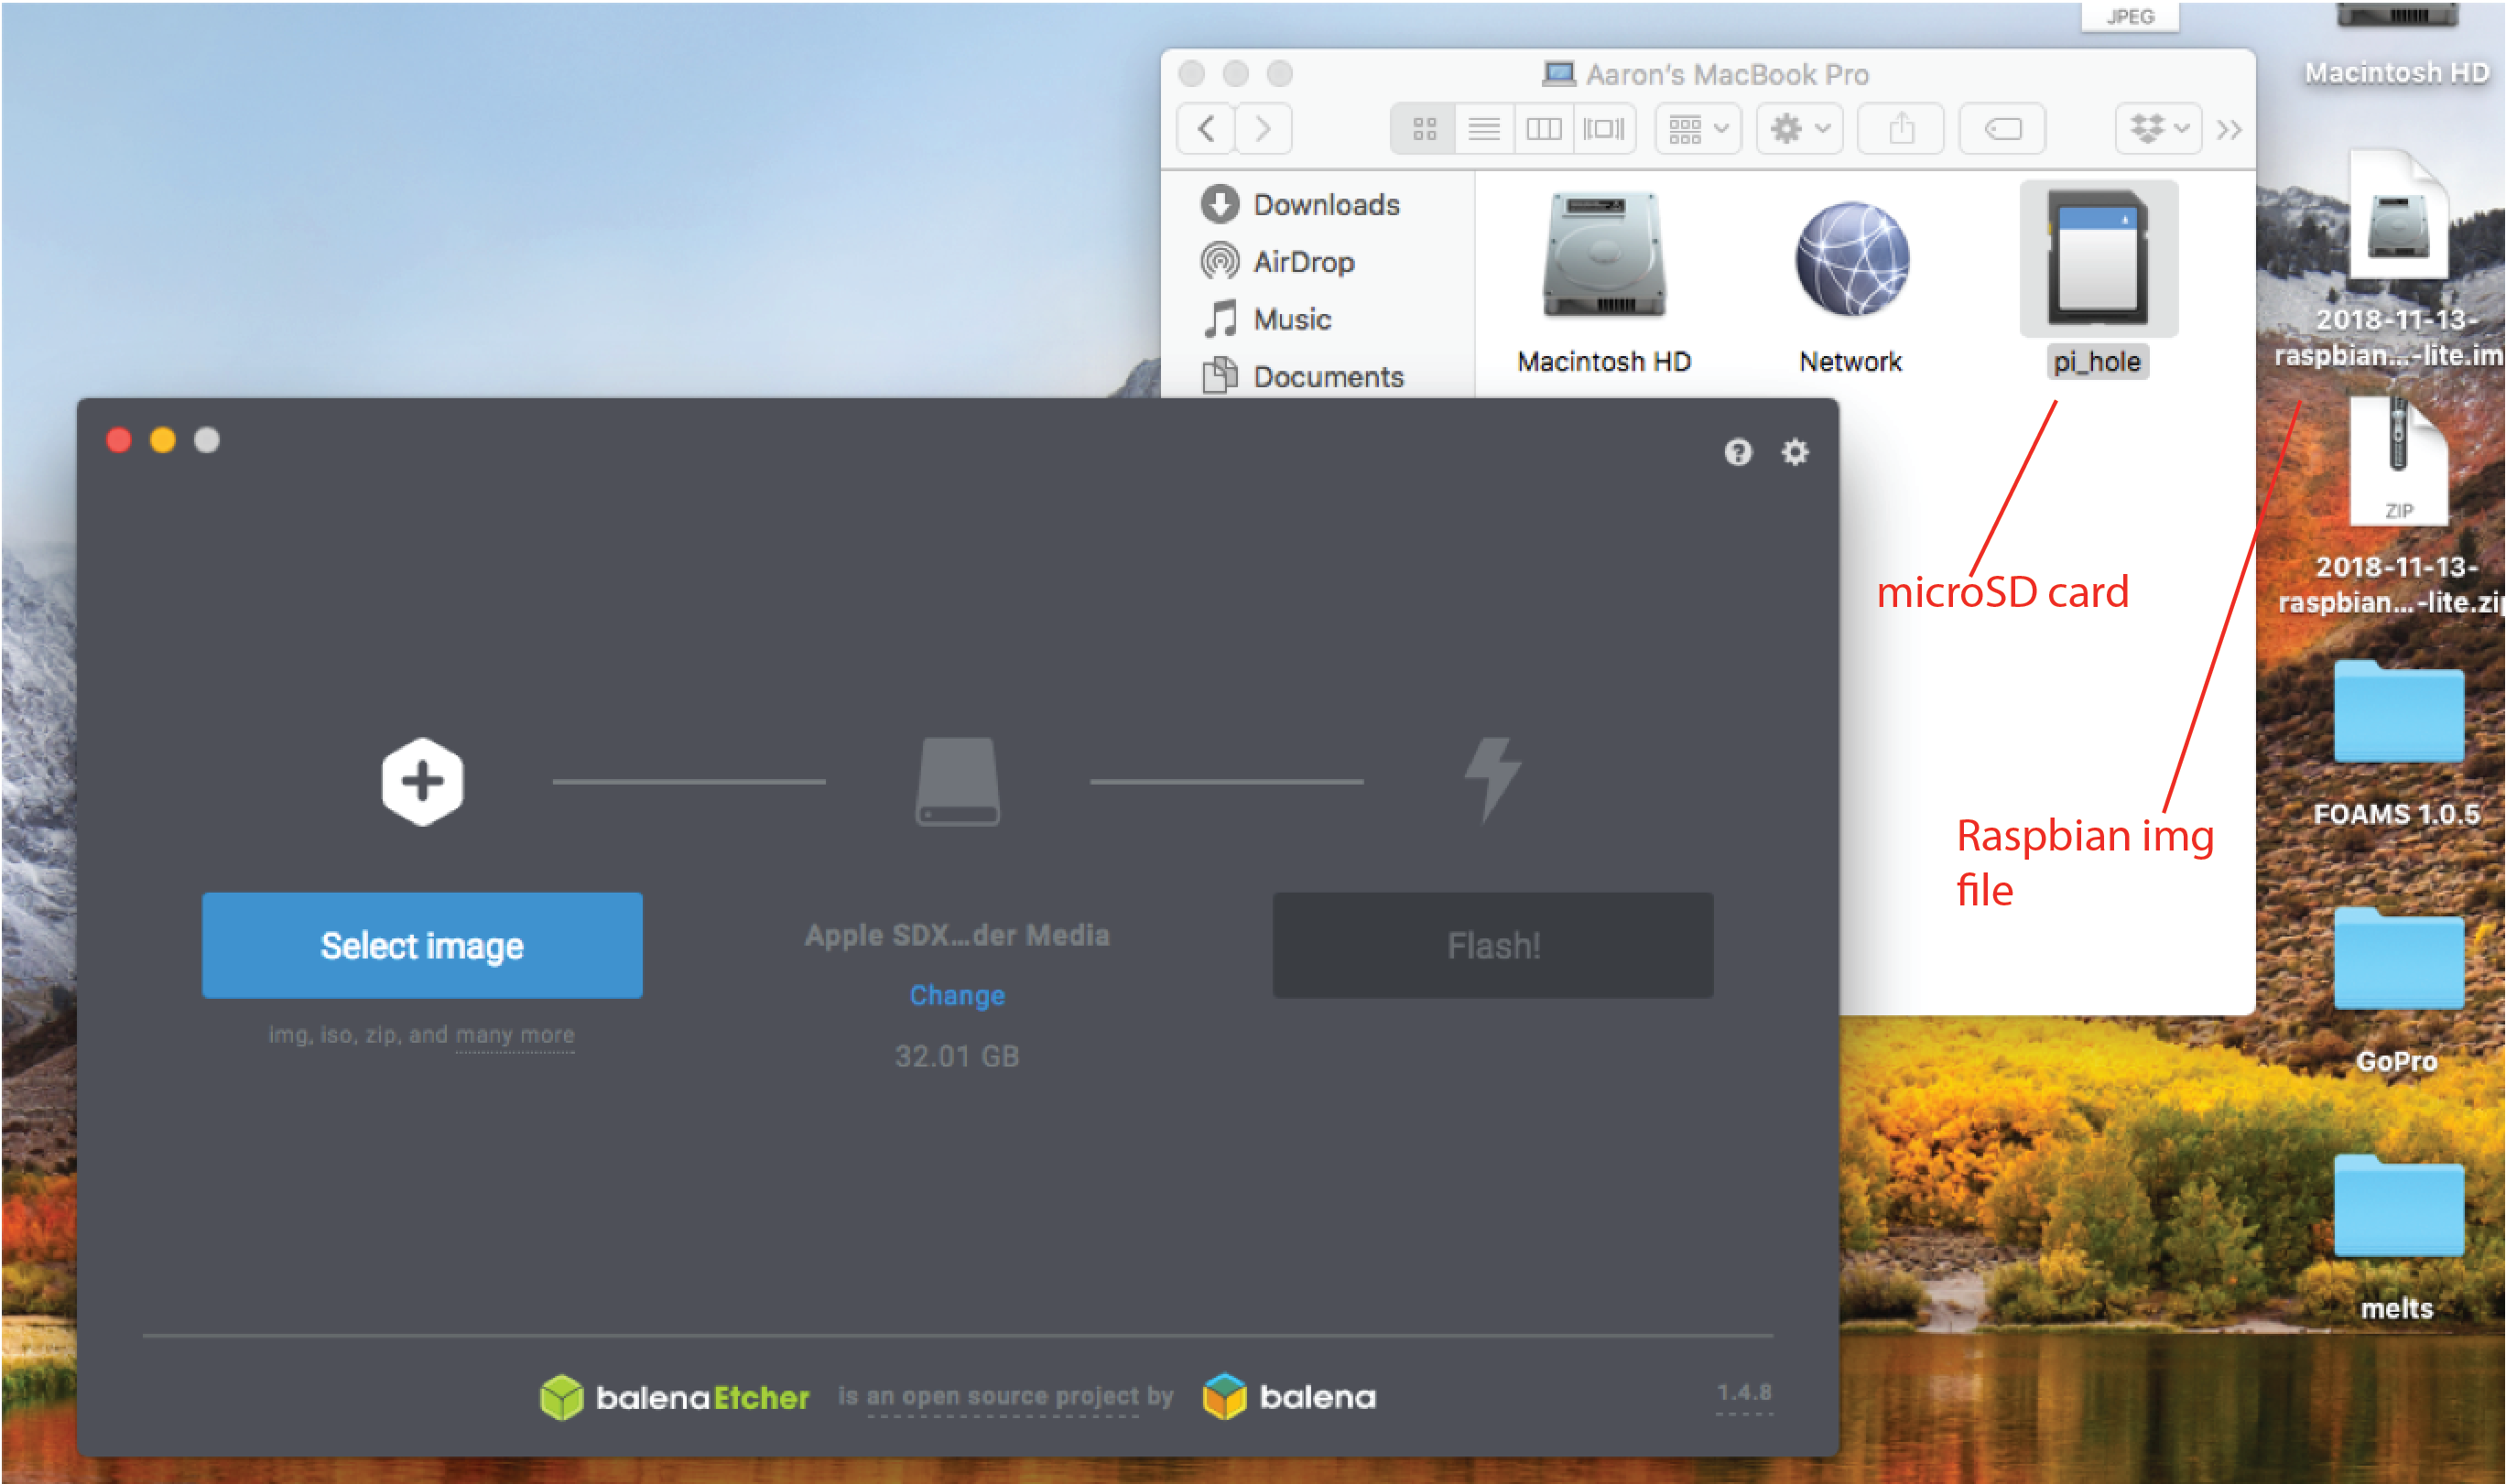

With Raspbian flashed you can remove the microSD card and place it into your RP. Plug in your monitor, keyboard, and power supply. Turning the RP on will initiate the installation of Raspian from the microSD card. A terminal will initiate once installation is complete and you may begin using the RP. You will be prompted to log in to the Pi using a login key and password. The factory default login is 'pi' and password 'raspberry'. Once logged in, your terminal prompt will read pi@raspberrypi:~ $.

Now we will configure the RP for secure shell access and change the login credentials. Secure shell (SSH) is a protocol that permits logging into computers remotely using another computer or node. This will remove the need to have a keyboard and mouse plugged into the RP. To do this, type the command

sudo raspi-config

This will open the configuration menu for the RP. Scroll down and select option 5 (Interfacing Options), then once in Interfacing Options you can select enable SSH. This will open your RP for remote access. Next, you will want to change your RP login credentials. SSH opens your RP for anyone to log in to if they know the RP IP address. Changing the password will add a level of security to prevent unauthorized access to the RP. Select option 1 (Change User Password) and type in your new password.

Once these two configurations are made, select <Finish> at the bottom of the configuration menu. This will prompt the terminal line to return. Now you need to obtain the RP's IP address for SSH access. Type

ifconfig

in the command prompt, and write down the RP IP address under 'eth0','Inet addr'. You can now log in remotely using your desktop or notebook computer.

#### Logging into RP Using SSH

Logging into your RP will be different whether you're using a Windows machine, Mac, or Linux. Mac and Linux users simply need to open up a terminal, and type

ssh pi@YOUR_PI_IP_ADDRESS

where YOUR_PI_IP_ADDRESS is the IP address of the RP you want to remotely access. You will be prompted to type in the RP password you set in the configuration files. Be sure the machine you're using as a node has SSH enabled (for MacOS, go to Apple>System Preferences>Sharing>remote login and enable remote login.

ssh.png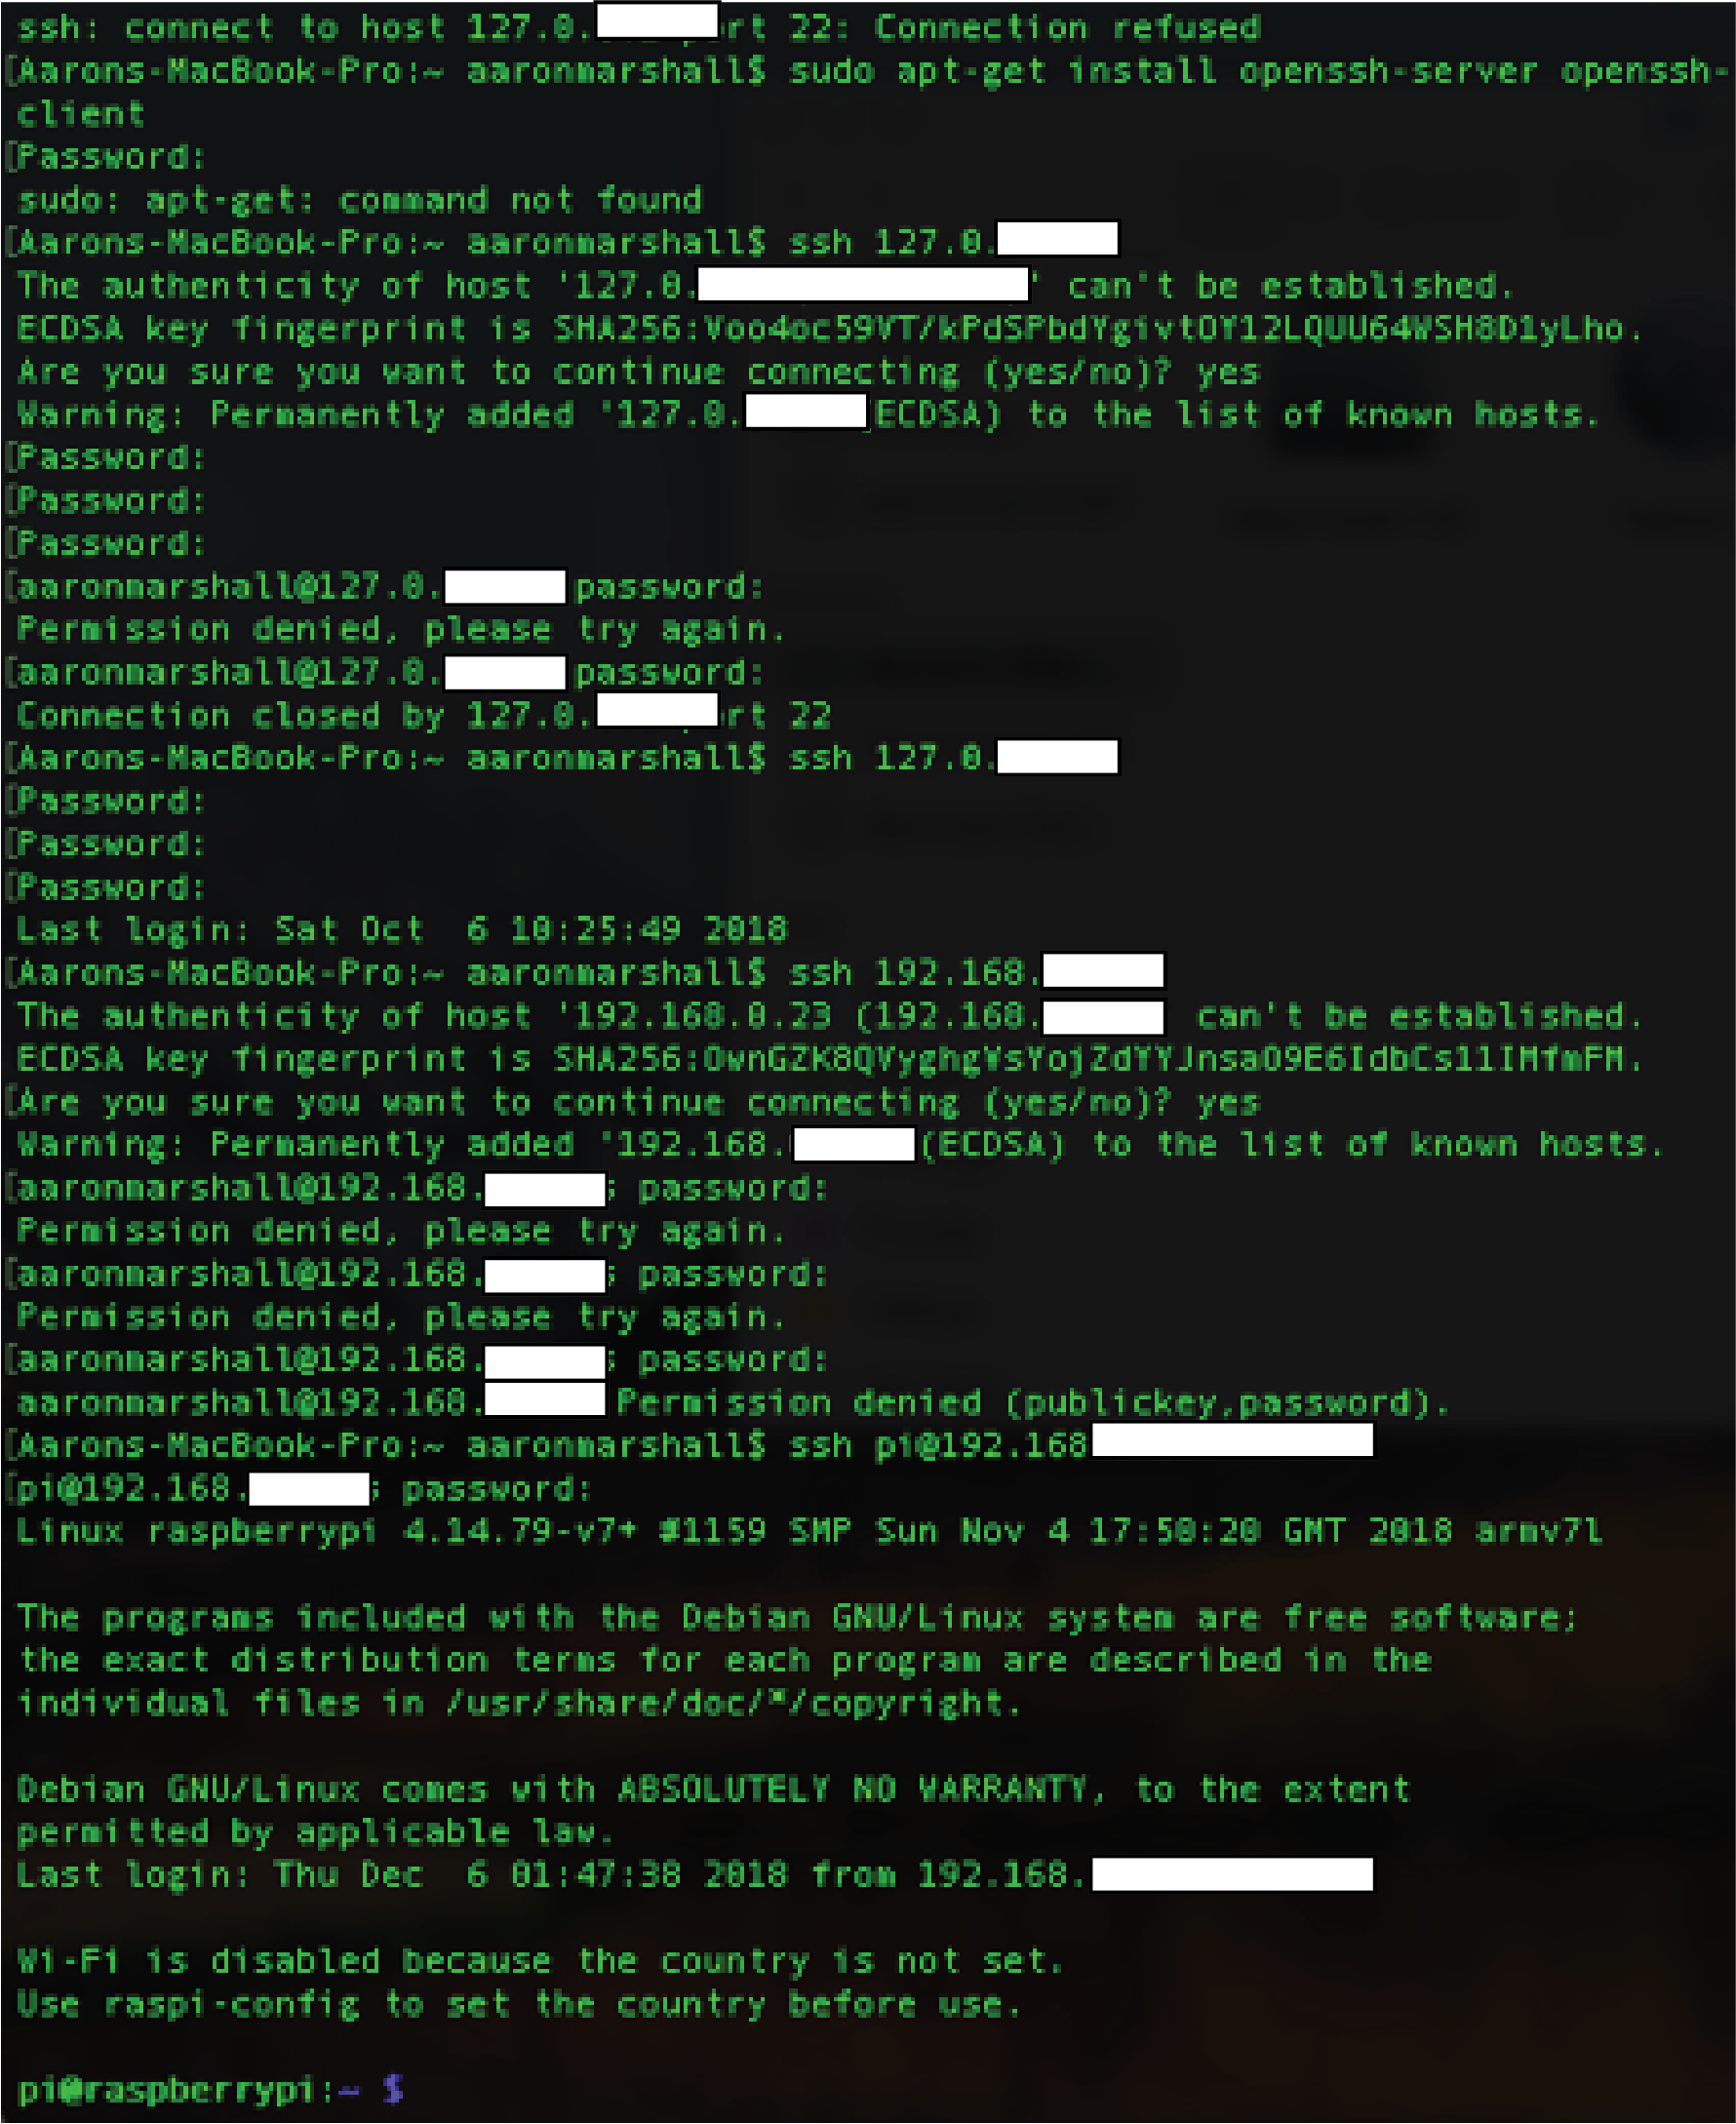

Windows does not come SSH compatible. Windows users need to download PuTTY (https://www.putty.org). PuTTY is a free SSH client that will allow Windows users to SSH into other computers. Once downloaded, type in the RP IP address in the 'Host Name' box, and leave Port 22 selected. This is the same as logging in using a Mac or Linux terminal.

#### Downloading and Installing Pi-Hole

From the RP terminal, tpye the command

curl -sSL https://install.pi-hole.net | bash

This will install the Pi-Hole software to the RP in bash. This code updates periodically, and the up-to-date script will always be posted at https://pi-hole.net. Installation begins once you hit return, and will be automated until it's time to configure the software on your RP.

A series of automated configuration windows will appear. Most of these are prompts to click through (e.g. a donation prompt). The first prompt that requires a user-decision is one to select a domain name system (DNS) server. Options include Google, OpenDNS, Level3, and others. For my installation, I used OpenDNS, but any of the options will work.

Next, a protocol selection screen will appear with the options IPv4 and IPv6. Most standard routers use just IPv4, so you can deselect IPv6, but there is no harm in leaving it selected if you're unsure about your router's settings.

You will be asked next if you want to use your current network settings as your static IP address. You don't need to change anything on this screen.

You will be given the option to install the web admin interface. I recommend this as it allows you to monitor the traffic that attempts to go through your network. You will subsequently be asked if you'd like to log queries, which I also recommend so all the data will be plotted.

Next, Pi-Hole will finish it's installation and provide you with a web interface login and an admin password. Make a note of these as they are needed to access the web interface.

complete2.png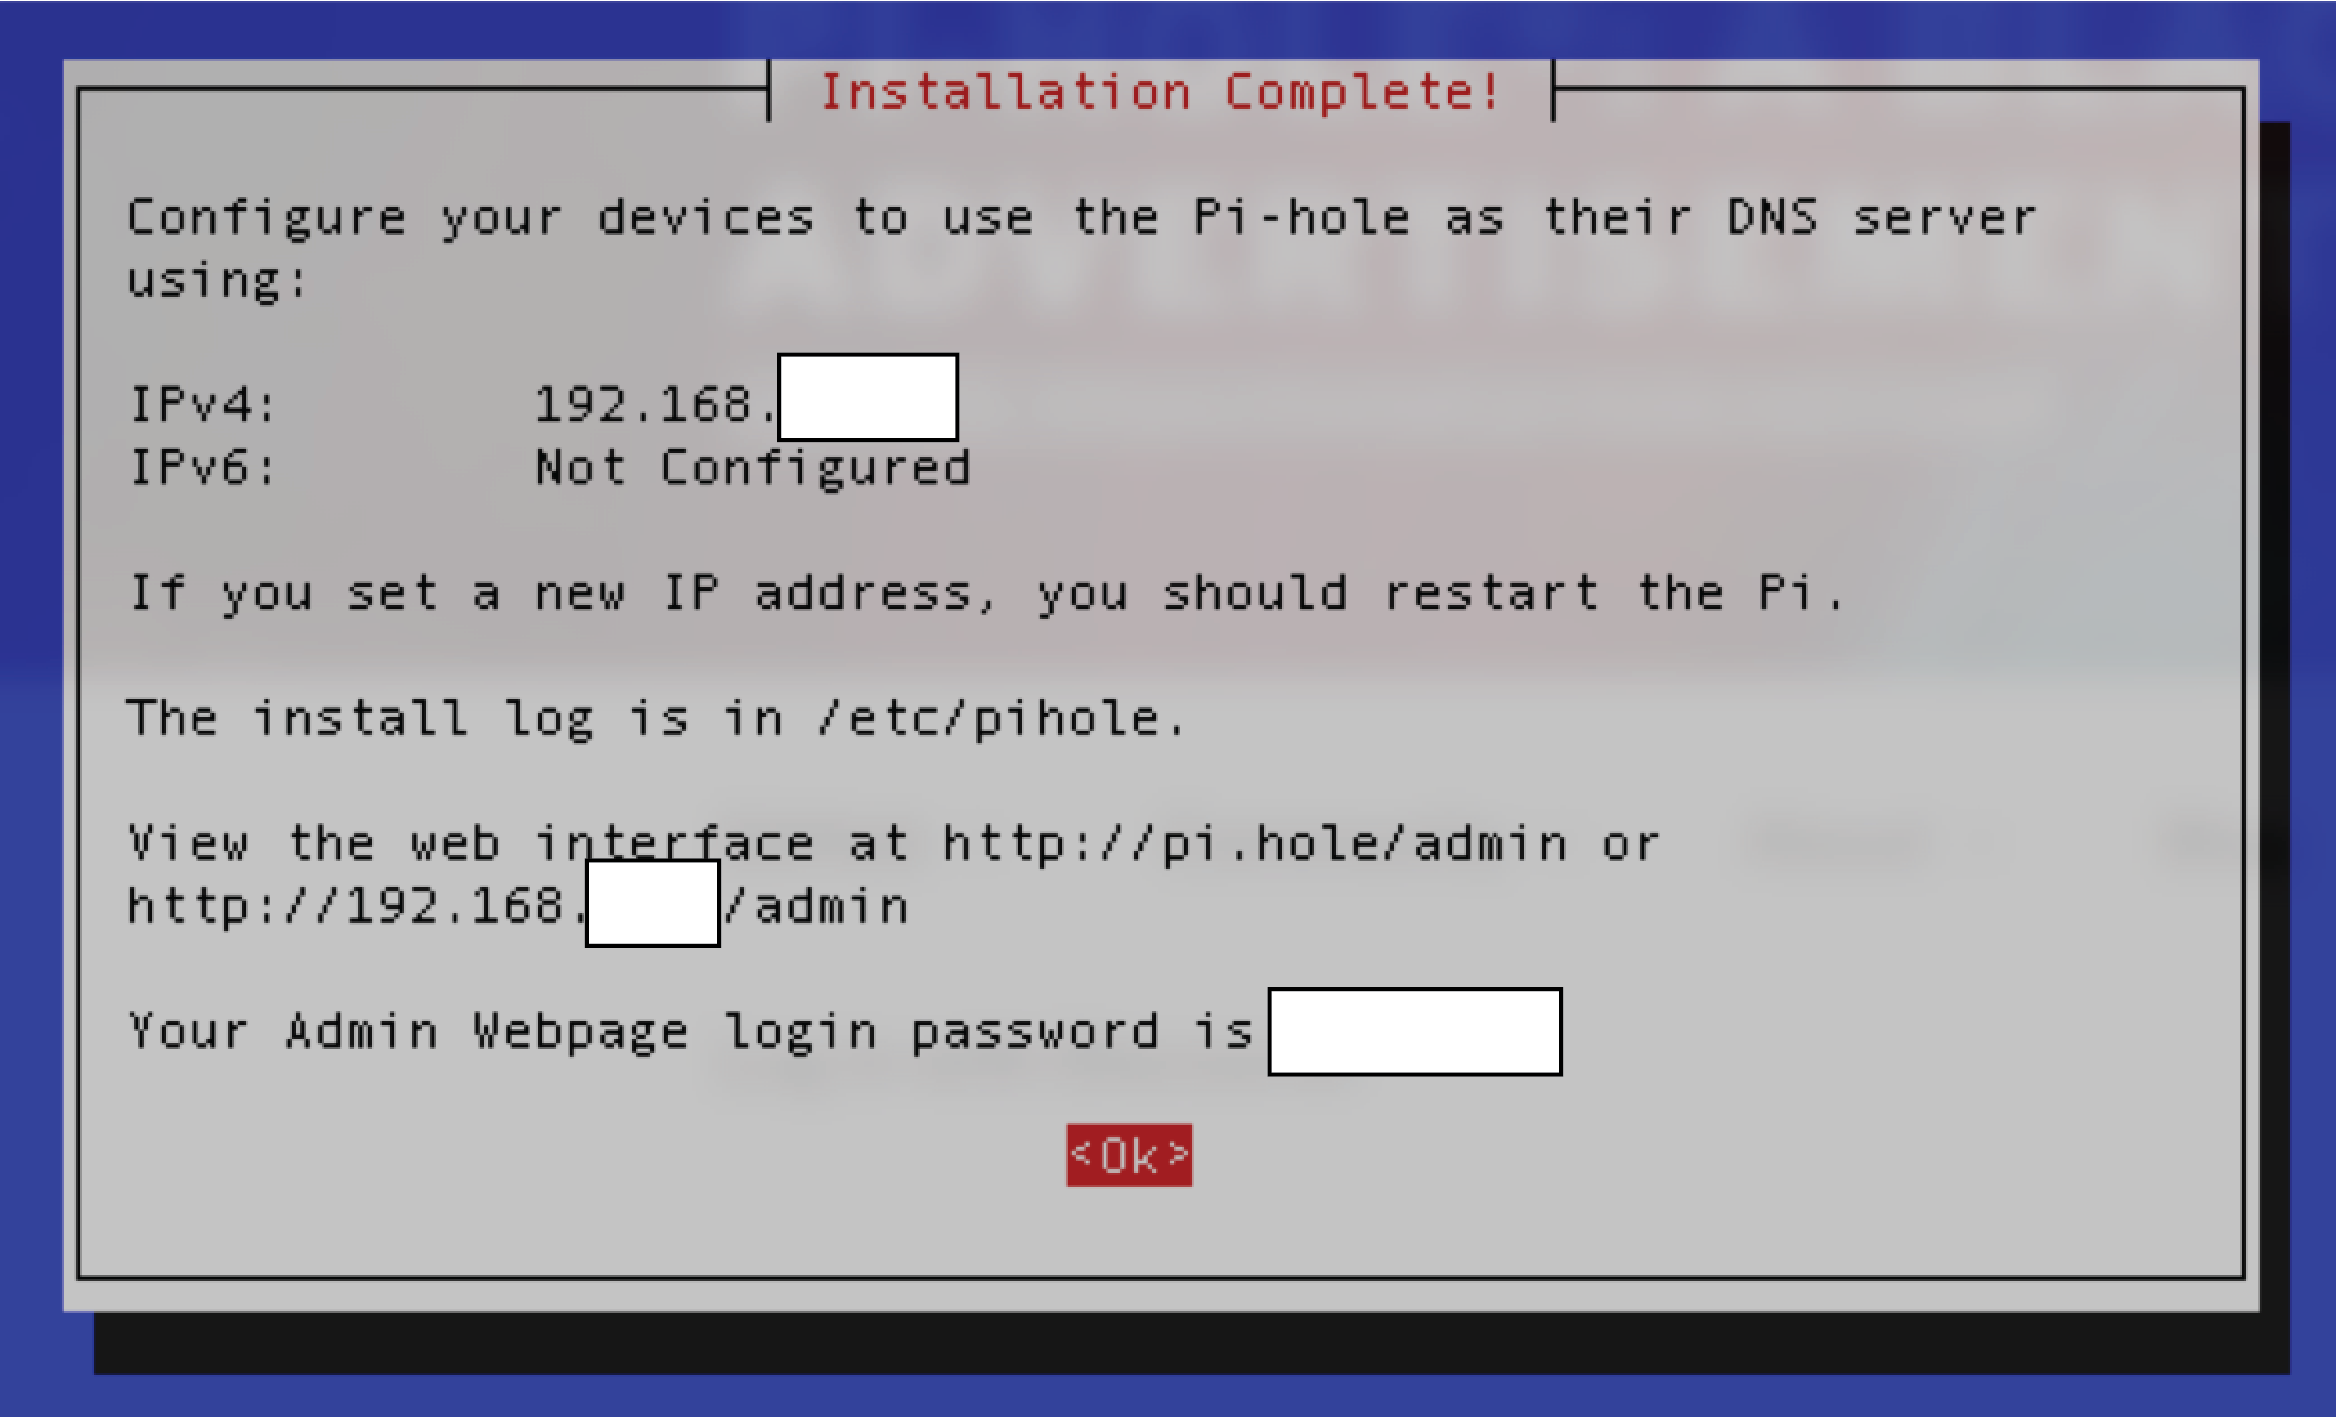

The address should be http://YOUR_IP_ADDRESS/admin

where YOUR_IP_ADDRESS is the RP IP address. The pssword is randomly generated.

#### Final Configurations

The first time you log in to your RP from the browser, you will be prompted to enter the password generated during setup. Pi-Hole will generate a page of statistics (see below) that will allow you to track the traffic that attempts to access your network. On the right-hand side of the page will be a few tabs such as 'Whitelist' and 'Blacklist' that allow you to white list different pages you're OK with sending ads through on, or blacklist those that make it through the cracks, respectively.

pihole2.png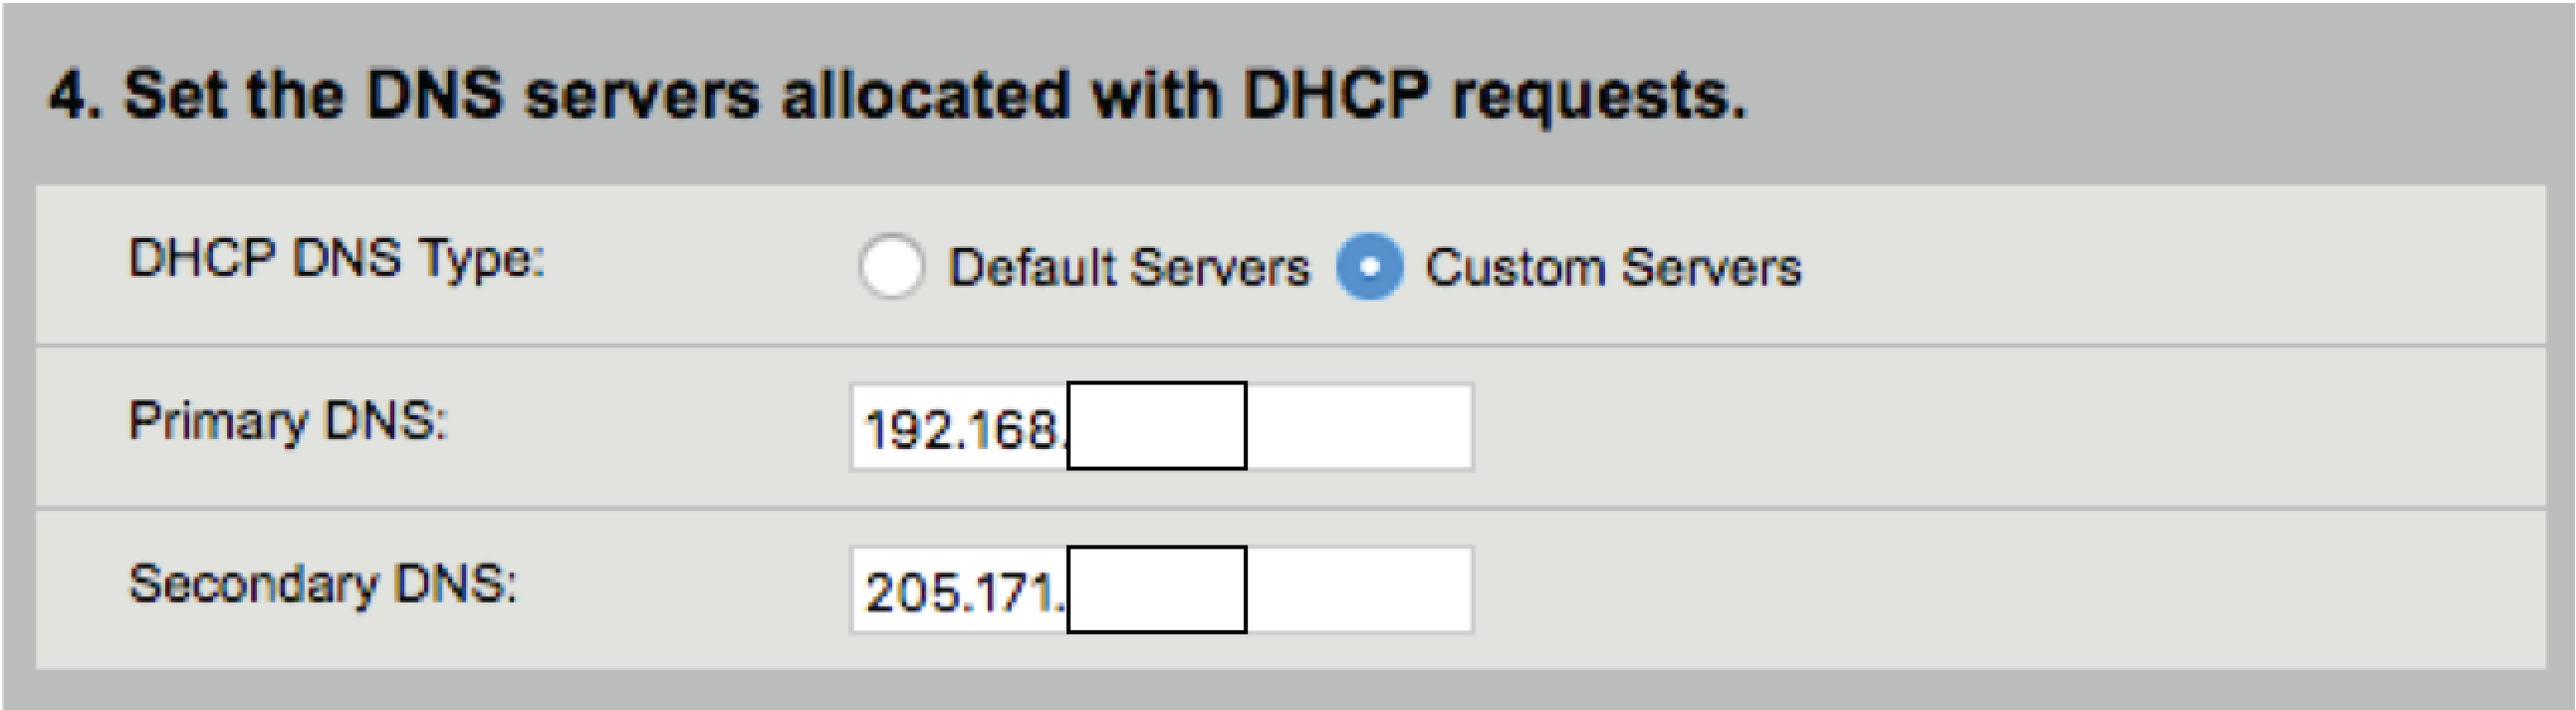

The final configuration is arranging for your router traffic to pass through the RP IP address. You access your router by typing the IP address into the search bar on your web browser. These next steps will be different for all routers. You will want to log in to the router using your network's password, then navigate to the router's DHCP/DNS settings. You will then change DHCP/DNS server name to your RP IP address (see below). This will change the DNS settings to use Pi-Hole to block abs. You may need to open up a terminal and type the command

ipconfig /renew

to grab the new DNS settings.

dnsdhcp.png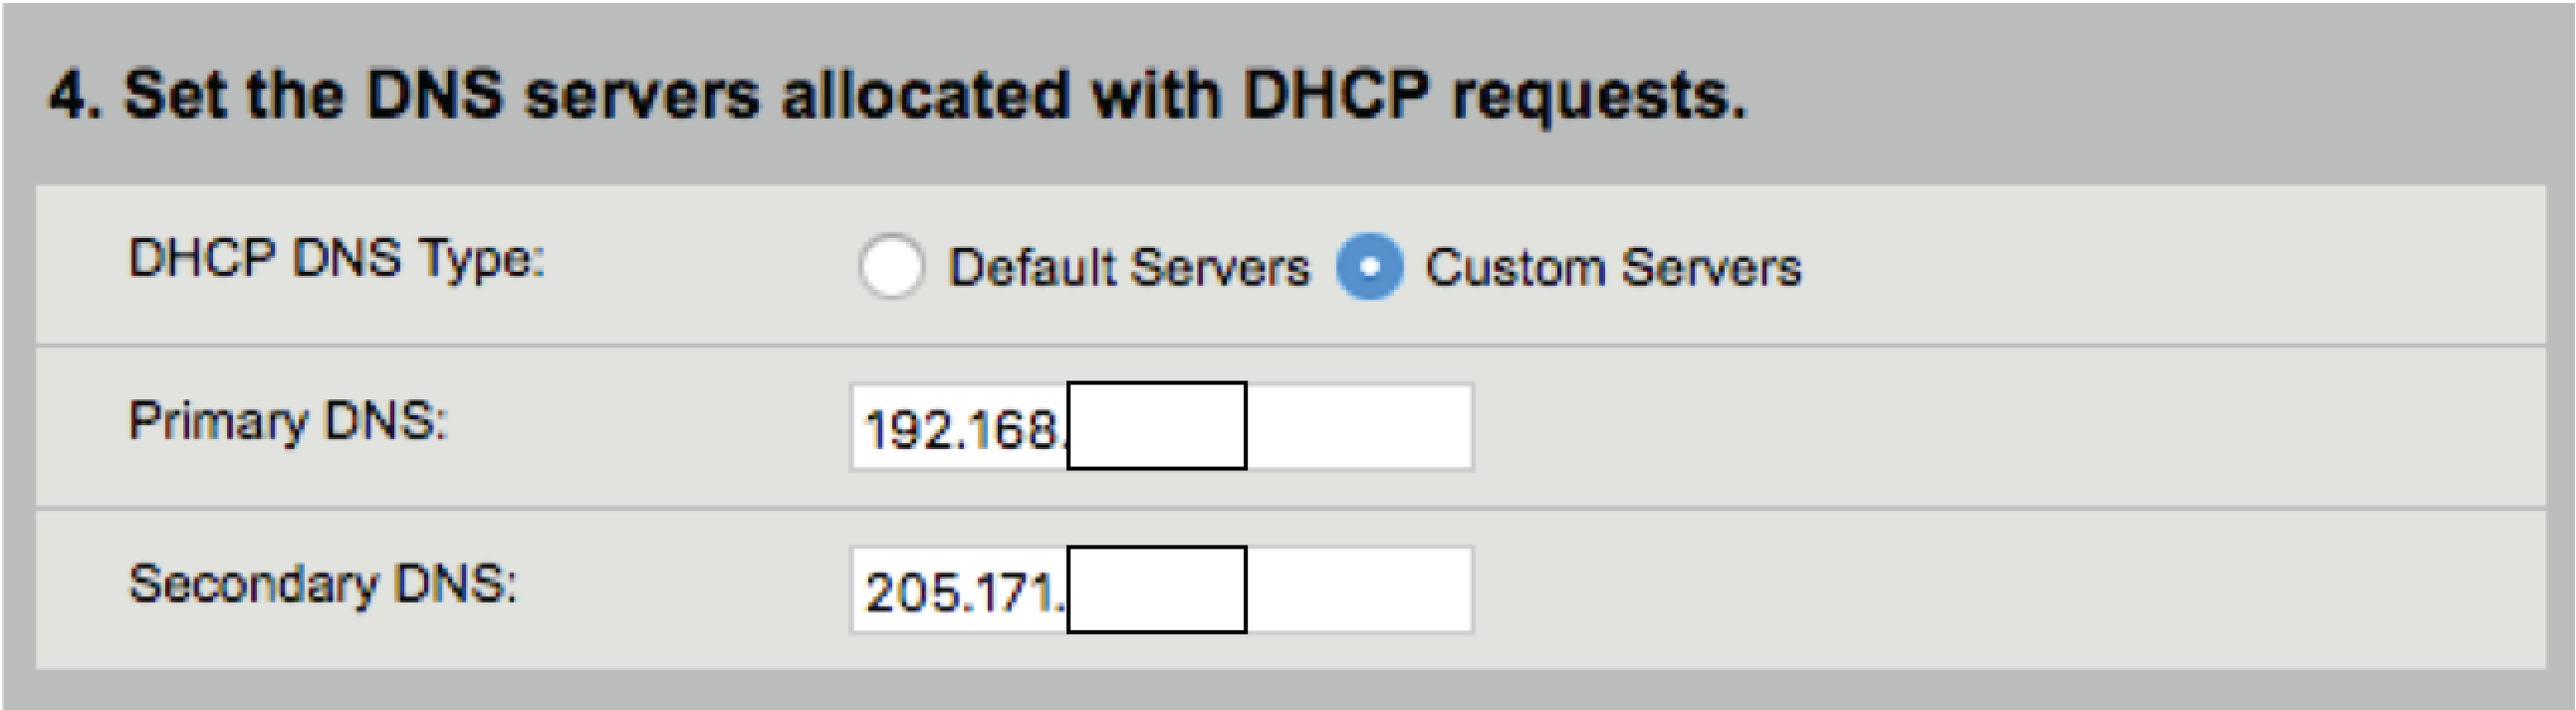

At this point, your network will begin blocking ads using the RP's Pi-Hole software.

#### Acknowledgements

While the work done for this project was my own, I learned a lot of the process from the YouTube, Smart Home, and StackOverflow communities online. If I got stuck, I turned to these resources.

Please consider donating to Pi-Hole (https://pi-hole.net/donate/)